## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.498227  1.788799 -0.061718  1.770900 -1.549544 -0.509430
1  1.141974  0.133481  0.029319 -0.241829 -1.212709  0.041776
2 -0.211466 -0.193295  0.282338  1.775701  1.192283  1.132256
3  0.924666 -0.053878  0.565567  0.064185 -0.183756  0.495091
4  0.805559 -0.021887  0.982226  0.627965  0.325604  1.101027


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9783755	total: 46.6ms	remaining: 46.6s
1:	learn: 0.9673504	total: 47ms	remaining: 23.5s
2:	learn: 0.9586476	total: 47.5ms	remaining: 15.8s
3:	learn: 0.9479863	total: 47.9ms	remaining: 11.9s
4:	learn: 0.9387675	total: 48.3ms	remaining: 9.62s
5:	learn: 0.9295231	total: 48.7ms	remaining: 8.07s
6:	learn: 0.9184966	total: 49.1ms	remaining: 6.97s
7:	learn: 0.9100389	total: 49.5ms	remaining: 6.14s
8:	learn: 0.9003307	total: 49.9ms	remaining: 5.5s
9:	learn: 0.8899800	total: 50.3ms	remaining: 4.98s
10:	learn: 0.8795619	total: 50.7ms	remaining: 4.55s
11:	learn: 0.8684280	total: 51.4ms	remaining: 4.23s
12:	learn: 0.8589753	total: 51.7ms	remaining: 3.93s
13:	learn: 0.8506551	total: 52.1ms	remaining: 3.67s
14:	learn: 0.8431482	total: 52.4ms	remaining: 3.44s
15:	learn: 0.8344569	total: 52.8ms	remaining: 3.25s
16:	learn: 0.8254822	total: 53.2ms	remaining: 3.08s
17:	learn: 0.8159179	total: 53.6ms	remaining: 2.92s
18:	learn: 0.8081858	total: 54ms	remaining: 2.7

198:	learn: 0.1709338	total: 123ms	remaining: 495ms
199:	learn: 0.1694410	total: 123ms	remaining: 494ms
200:	learn: 0.1681774	total: 124ms	remaining: 492ms
201:	learn: 0.1669190	total: 124ms	remaining: 491ms
202:	learn: 0.1655729	total: 125ms	remaining: 489ms
203:	learn: 0.1644327	total: 125ms	remaining: 487ms
204:	learn: 0.1630329	total: 125ms	remaining: 486ms
205:	learn: 0.1620446	total: 126ms	remaining: 484ms
206:	learn: 0.1605907	total: 126ms	remaining: 483ms
207:	learn: 0.1594359	total: 126ms	remaining: 481ms
208:	learn: 0.1578836	total: 127ms	remaining: 479ms
209:	learn: 0.1568546	total: 127ms	remaining: 478ms
210:	learn: 0.1555875	total: 127ms	remaining: 477ms
211:	learn: 0.1543030	total: 128ms	remaining: 475ms
212:	learn: 0.1533790	total: 128ms	remaining: 474ms
213:	learn: 0.1523744	total: 129ms	remaining: 472ms
214:	learn: 0.1512693	total: 129ms	remaining: 471ms
215:	learn: 0.1501813	total: 129ms	remaining: 469ms
216:	learn: 0.1488905	total: 130ms	remaining: 468ms
217:	learn: 

471:	learn: 0.0344167	total: 227ms	remaining: 253ms
472:	learn: 0.0342222	total: 227ms	remaining: 253ms
473:	learn: 0.0340716	total: 227ms	remaining: 252ms
474:	learn: 0.0338815	total: 228ms	remaining: 252ms
475:	learn: 0.0338367	total: 228ms	remaining: 251ms
476:	learn: 0.0337058	total: 228ms	remaining: 250ms
477:	learn: 0.0335116	total: 229ms	remaining: 250ms
478:	learn: 0.0334475	total: 229ms	remaining: 249ms
479:	learn: 0.0333844	total: 229ms	remaining: 249ms
480:	learn: 0.0332324	total: 230ms	remaining: 248ms
481:	learn: 0.0331933	total: 230ms	remaining: 247ms
482:	learn: 0.0331316	total: 230ms	remaining: 247ms
483:	learn: 0.0328861	total: 231ms	remaining: 246ms
484:	learn: 0.0328478	total: 231ms	remaining: 245ms
485:	learn: 0.0328099	total: 232ms	remaining: 245ms
486:	learn: 0.0326252	total: 232ms	remaining: 244ms
487:	learn: 0.0325019	total: 232ms	remaining: 244ms
488:	learn: 0.0324672	total: 233ms	remaining: 243ms
489:	learn: 0.0323482	total: 233ms	remaining: 242ms
490:	learn: 

749:	learn: 0.0128397	total: 332ms	remaining: 111ms
750:	learn: 0.0127939	total: 332ms	remaining: 110ms
751:	learn: 0.0127125	total: 333ms	remaining: 110ms
752:	learn: 0.0126627	total: 333ms	remaining: 109ms
753:	learn: 0.0126124	total: 334ms	remaining: 109ms
754:	learn: 0.0125622	total: 334ms	remaining: 108ms
755:	learn: 0.0125312	total: 335ms	remaining: 108ms
756:	learn: 0.0124819	total: 335ms	remaining: 108ms
757:	learn: 0.0124032	total: 336ms	remaining: 107ms
758:	learn: 0.0123292	total: 336ms	remaining: 107ms
759:	learn: 0.0122529	total: 336ms	remaining: 106ms
760:	learn: 0.0121809	total: 337ms	remaining: 106ms
761:	learn: 0.0121269	total: 337ms	remaining: 105ms
762:	learn: 0.0120531	total: 337ms	remaining: 105ms
763:	learn: 0.0119736	total: 338ms	remaining: 104ms
764:	learn: 0.0119262	total: 338ms	remaining: 104ms
765:	learn: 0.0118547	total: 339ms	remaining: 103ms
766:	learn: 0.0118088	total: 339ms	remaining: 103ms
767:	learn: 0.0117765	total: 339ms	remaining: 103ms
768:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

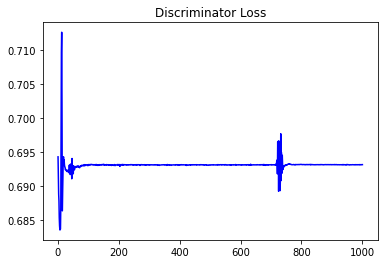

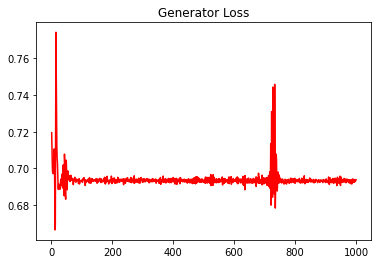

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1279844820323482


#### Sanity Checks 

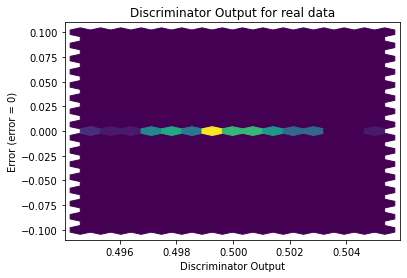

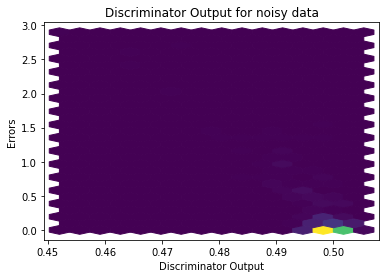

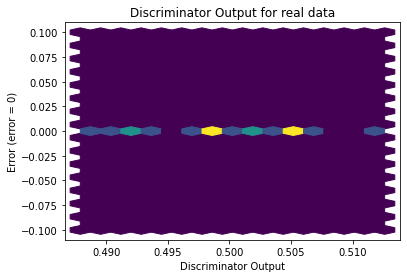

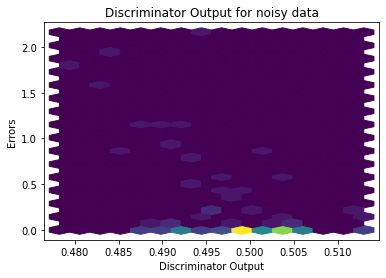

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


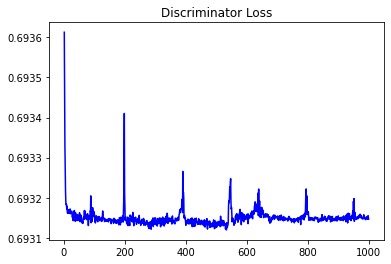

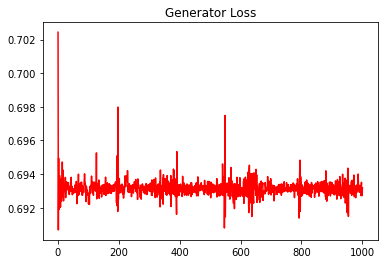

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17213271272766686


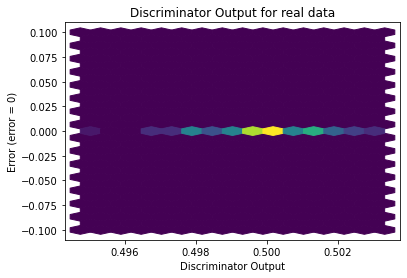

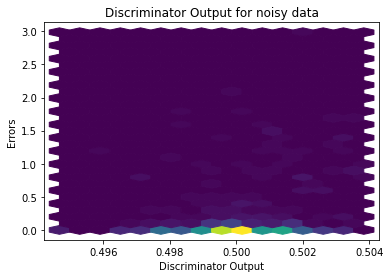

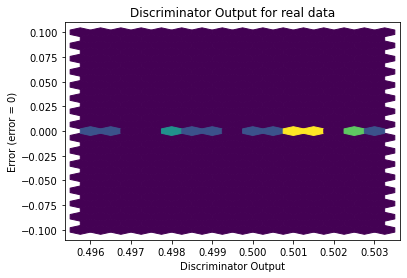

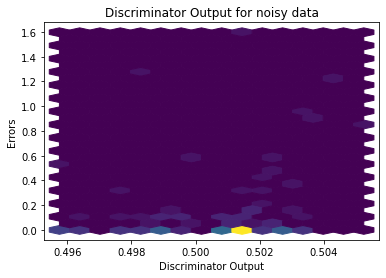

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0131]], device='cuda:0', requires_grad=True)
